In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [2]:
data = pd.read_excel("OSA_extreme_male.xlsx")
df_OSA_male = pd.DataFrame(data)

# Decision Tree Regression

In [3]:
features = ['Age','Cervical','BMI']

In [4]:
# Creating X and y
X = df_OSA_male[features]
y = df_OSA_male['IAH']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Building Decision Tree Model

In [6]:
# Create Decision Tree Regressor object
tree_model = DecisionTreeRegressor(max_depth=3).fit(X, y)

# Train Decision Tree Regressor
tree_model = tree_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree_model.predict(X_test)

In [7]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R-Squared:', r2_score(y_test, y_pred))

RMSE: 8.953058318770443
MAE: 7.449823122960039
R-Squared: -0.058158779552987205


# Decision Tree Classification

In [8]:
features = ['Age','Cervical','BMI']

In [9]:
# Creating X and y
X = df_OSA_male[features]
y = df_OSA_male['OSA']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Building Decision Tree Model

In [11]:
# Create Decision Tree Classifer object
tree_model = DecisionTreeClassifier(max_depth=3).fit(X, y)

# Train Decision Tree Classifer
tree_model = tree_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree_model.predict(X_test)

[Text(167.4, 190.26, 'X[0] <= 44.5\ngini = 0.494\nsamples = 254\nvalue = [113, 141]'),
 Text(83.7, 135.9, 'X[2] <= 33.836\ngini = 0.483\nsamples = 113\nvalue = [67, 46]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 21.5\ngini = 0.453\nsamples = 101\nvalue = [66, 35]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.444\nsamples = 99\nvalue = [66, 33]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 44.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(104.625, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 26.688\ngini = 0.44\nsamples = 141\nvalue = [46, 95]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 51.5\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Tex

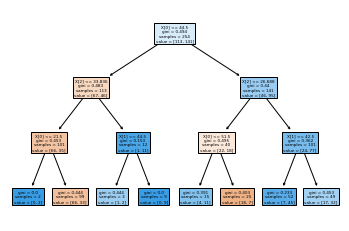

In [12]:
plot_tree(tree_model, filled=True) 

### Evaluating Model

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.625


### Visualizing Decision Trees

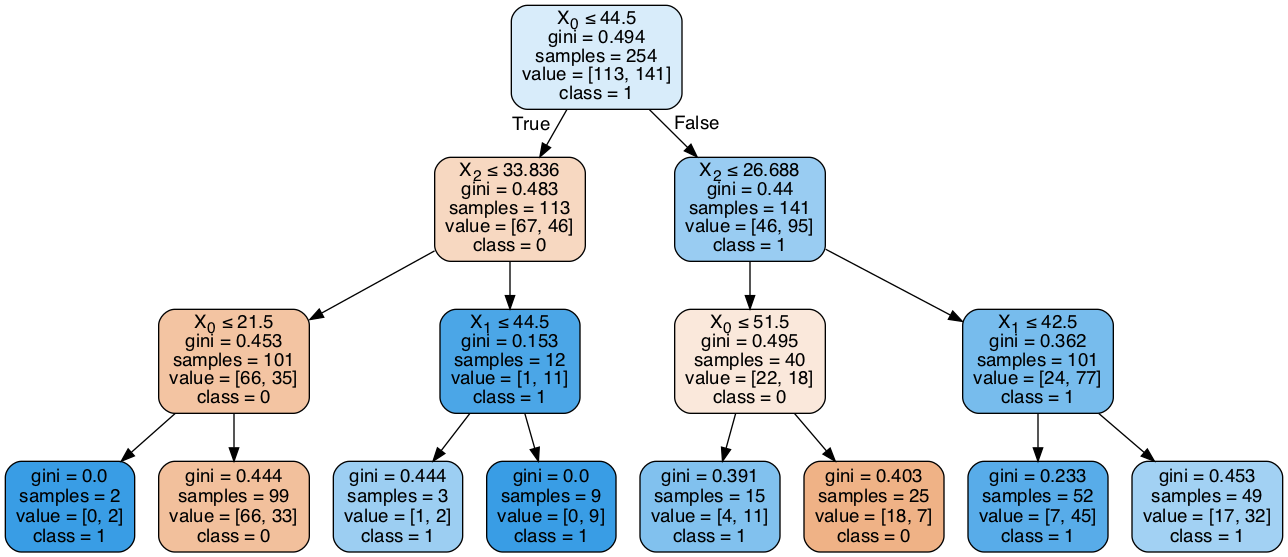

In [14]:
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision_Tree_Classification.png')
Image(graph.create_png())